In [5]:
import pathlib
import torch
import torchaudio
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tgt import read_textgrid


In [91]:
YAGA_DIR = pathlib.Path("../data/CMU_ARCTICS_SJB30_YAGA/")
BPDP_DIR = pathlib.Path("../data/CMU_ARCTICS_SJB30_BPDP5/")
HPZFF_DIR = pathlib.Path("../data/CMU_ARCTICS_SJB30_HPZFF/")

In [187]:
wav_path = pathlib.Path("../data/CMU_ARCTICS_SJB30/slt/arctic_a0002.wav")
wav, sr = torchaudio.load(str(wav_path))

yaga_path = YAGA_DIR/ wav_path.parent.stem / f"{wav_path.stem}.wav.txt"
bpdp_path = BPDP_DIR/  wav_path.parent.stem / f"{wav_path.stem}.wav.txt"
hpzff_path = HPZFF_DIR/ wav_path.parent.stem / f"{wav_path.stem}.wav.txt"

yaga = [int(c) for c in yaga_path.read_text().split()]
bpdp = [int(c) for c in bpdp_path.read_text().split()]
hpzff = [int(c) for c in hpzff_path.read_text().split()]

tgt_path = wav_path.with_suffix(".TextGrid")
        
tgt = read_textgrid(str(tgt_path))
vuv_tier = tgt.get_tier_by_name("vuv")
epoch_tier = tgt.get_tier_by_name("epoch")

ans = []

for voiced in vuv_tier:
    epoch = epoch_tier.get_annotations_between_timepoints(voiced.start_time, voiced.end_time)
    epoch = [int(point.time * sr) for point in epoch]
    ans += epoch
    


<StemContainer object of 3 artists>

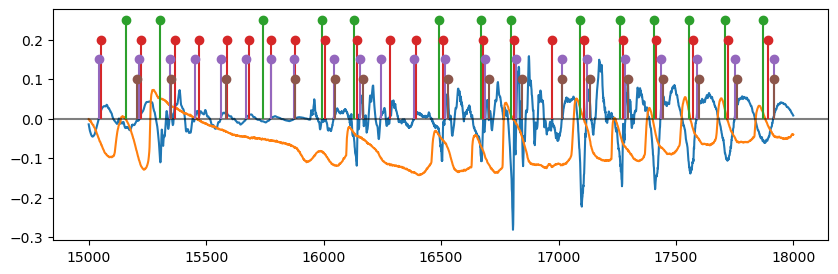

In [214]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
t = 15000
l = 3000
o = 20

_time = torch.arange(t, t+l)


#ax.plot(wav[0, t:t+10000])
ax.plot(_time, wav[0, t:t+l], label="Wavform")
ax.plot(_time, -wav[1, t+o:t+l+o], label="EGG")
#ax.plot(_time, y1[t:t+10000]/20, label="lowpass filtered waveform" )
ax.axhline(0, color='black', alpha=0.5)


# filter the p
_p = torch.tensor([x for x in ans if t < x < t + l]) + o
_y = torch.ones_like(_p)*0.25
ax.stem(_p.numpy(), _y.numpy(), 'C2-', basefmt=" ", label="GT")

# filter the p
_p = torch.tensor([x for x in yaga if t < x < t + l])
_y = torch.ones_like(_p)*0.20
ax.stem(_p.numpy(), _y.numpy(), 'C3-', basefmt=" ", label="YAGA")

# filter the p2
_p = torch.tensor([x for x in bpdp if t < x < t + l])
_y = torch.ones_like(_p)*0.15
ax.stem(_p.numpy(), _y.numpy(), 'C4-', markerfmt="o", basefmt=" ", label="BPDP")

# filter the p2
_p = torch.tensor([x for x in hpzff if t < x < t + l])
_y = torch.ones_like(_p)*0.10
ax.stem(_p.numpy(), _y.numpy(), 'C5-', markerfmt="o", basefmt=" ", label="ZFF")

#ax.legend(loc=2)
#fig.savefig("slt_a0002.pdf", bbox_inches = 'tight',  pad_inches = 0.1)

In [218]:
wav_path = pathlib.Path("../data/CMU_ARCTICS_SJB30/jmk/arctic_a0010.wav")
wav, sr = torchaudio.load(str(wav_path))

yaga_path = YAGA_DIR/ wav_path.parent.stem / f"{wav_path.stem}.wav.txt"
bpdp_path = BPDP_DIR/  wav_path.parent.stem / f"{wav_path.stem}.wav.txt"
hpzff_path = HPZFF_DIR/ wav_path.parent.stem / f"{wav_path.stem}.wav.txt"

yaga = [int(c) for c in yaga_path.read_text().split()]
bpdp = [int(c) for c in bpdp_path.read_text().split()]
hpzff = [int(c) for c in hpzff_path.read_text().split()]

tgt_path = wav_path.with_suffix(".TextGrid")
        
tgt = read_textgrid(str(tgt_path))
vuv_tier = tgt.get_tier_by_name("vuv")
epoch_tier = tgt.get_tier_by_name("epoch")

ans = []

for voiced in vuv_tier:
    epoch = epoch_tier.get_annotations_between_timepoints(voiced.start_time, voiced.end_time)
    epoch = [int(point.time * sr) for point in epoch]
    ans += epoch
    


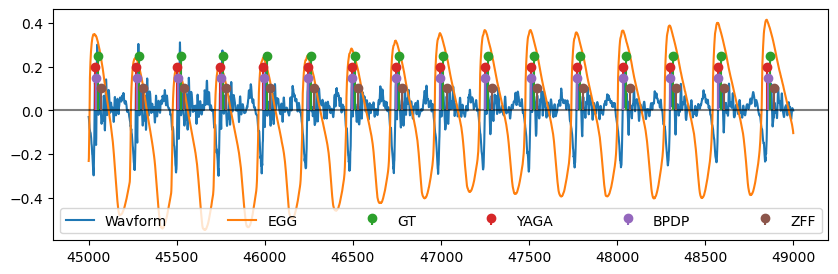

In [242]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
t = 45000
l = 4000
o = 50
_time = torch.arange(t, t+l)


#ax.plot(wav[0, t:t+10000])
ax.plot(_time, wav[0, t:t+l], label="Wavform")
ax.plot(_time, -wav[1, t:t+l], label="EGG")
#ax.plot(_time, y1[t:t+10000]/20, label="lowpass filtered waveform" )
ax.axhline(0, color='black', alpha=0.5)


# filter the p
_p = torch.tensor([x for x in ans if t < x < t + l]) + o
_y = torch.ones_like(_p)*0.25
ax.stem(_p.numpy(), _y.numpy(), 'C2-', basefmt=" ", label="GT")

# filter the p
_p = torch.tensor([x for x in yaga if t < x < t + l])
_y = torch.ones_like(_p)*0.20
ax.stem(_p.numpy(), _y.numpy(), 'C3-', basefmt=" ", label="YAGA")

# filter the p2
_p = torch.tensor([x for x in bpdp if t < x < t + l])
_y = torch.ones_like(_p)*0.15
ax.stem(_p.numpy(), _y.numpy(), 'C4-', markerfmt="o", basefmt=" ", label="BPDP")

# filter the p2
_p = torch.tensor([x for x in hpzff if t < x < t + l])
_y = torch.ones_like(_p)*0.10
ax.stem(_p.numpy(), _y.numpy(), 'C5-', markerfmt="o", basefmt=" ", label="ZFF")

ax.legend(loc=4, mode = "expand", ncol = 6)
#fig.savefig("jmk_a0010.pdf", bbox_inches = 'tight',  pad_inches = 0.1)

In [152]:
wav_path = pathlib.Path("../data/CMU_ARCTICS_SJB30/jmk/arctic_a0003.wav")
wav, sr = torchaudio.load(str(wav_path))

yaga_path = YAGA_DIR/ wav_path.parent.stem / f"{wav_path.stem}.wav.txt"
bpdp_path = BPDP_DIR/  wav_path.parent.stem / f"{wav_path.stem}.wav.txt"
hpzff_path = HPZFF_DIR/ wav_path.parent.stem / f"{wav_path.stem}.wav.txt"

yaga = [int(c) for c in yaga_path.read_text().split()]
bpdp = [int(c) for c in bpdp_path.read_text().split()]
hpzff = [int(c) for c in hpzff_path.read_text().split()]

tgt_path = wav_path.with_suffix(".TextGrid")
        
tgt = read_textgrid(str(tgt_path))
vuv_tier = tgt.get_tier_by_name("vuv")
epoch_tier = tgt.get_tier_by_name("epoch")

ans = []

for voiced in vuv_tier:
    epoch = epoch_tier.get_annotations_between_timepoints(voiced.start_time, voiced.end_time)
    epoch = [int(point.time * sr) for point in epoch]
    ans += epoch
    


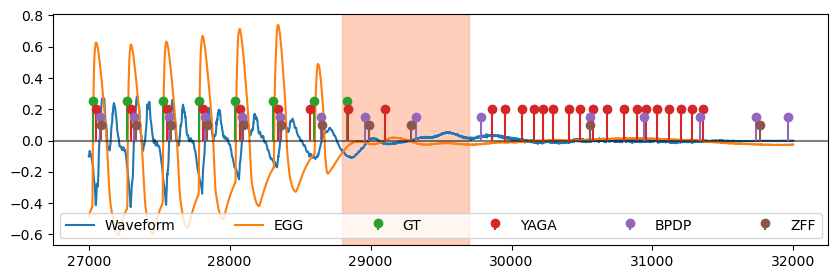

In [151]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
t = 27000
l = 5000

_time = torch.arange(t, t+l)


#ax.plot(wav[0, t:t+10000])
ax.plot(_time, wav[0, t:t+l], label="Waveform")
ax.plot(_time, -wav[1, t:t+l], label="EGG")
#ax.plot(_time, y1[t:t+10000]/20, label="lowpass filtered waveform" )
ax.axhline(0, color='black', alpha=0.5)


# filter the p
_p = torch.tensor([x for x in ans if t < x < t + l])
_y = torch.ones_like(_p)*0.25
ax.stem(_p.numpy(), _y.numpy(), 'C2-', basefmt=" ", label="GT")

# filter the p
_p = torch.tensor([x for x in yaga if t < x < t + l])
_y = torch.ones_like(_p)*0.20
ax.stem(_p.numpy(), _y.numpy(), 'C3-', basefmt=" ", label="YAGA")

# filter the p2
_p = torch.tensor([x for x in bpdp if t < x < t + l])
_y = torch.ones_like(_p)*0.15
ax.stem(_p.numpy(), _y.numpy(), 'C4-', markerfmt="o", basefmt=" ", label="BPDP")

# filter the p2
_p = torch.tensor([x for x in hpzff if t < x < t + l])
_y = torch.ones_like(_p)*0.10
ax.stem(_p.numpy(), _y.numpy(), 'C5-', markerfmt="o", basefmt=" ", label="ZFF")

ax.axvspan(28800, 29700, alpha=0.5, color='lightsalmon')

ax.legend(loc=4, mode = "expand", ncol = 6)
#fig.savefig("jmk_a0003.pdf", bbox_inches = 'tight',  pad_inches = 0.1)

In [130]:
99245/32000

3.10140625

In [225]:
wav_path = pathlib.Path("../data/CMU_ARCTICS_SJB30/bdl/arctic_a0010.wav")
wav, sr = torchaudio.load(str(wav_path))

yaga_path = YAGA_DIR/ wav_path.parent.stem / f"{wav_path.stem}.wav.txt"
bpdp_path = BPDP_DIR/  wav_path.parent.stem / f"{wav_path.stem}.wav.txt"
hpzff_path = HPZFF_DIR/ wav_path.parent.stem / f"{wav_path.stem}.wav.txt"

yaga = [int(c) for c in yaga_path.read_text().split()]
bpdp = [int(c) for c in bpdp_path.read_text().split()]
hpzff = [int(c) for c in hpzff_path.read_text().split()]

tgt_path = wav_path.with_suffix(".TextGrid")
        
tgt = read_textgrid(str(tgt_path))
vuv_tier = tgt.get_tier_by_name("vuv")
epoch_tier = tgt.get_tier_by_name("epoch")

ans = []

for voiced in vuv_tier:
    epoch = epoch_tier.get_annotations_between_timepoints(voiced.start_time, voiced.end_time)
    epoch = [int(point.time * sr) for point in epoch]
    ans += epoch
    


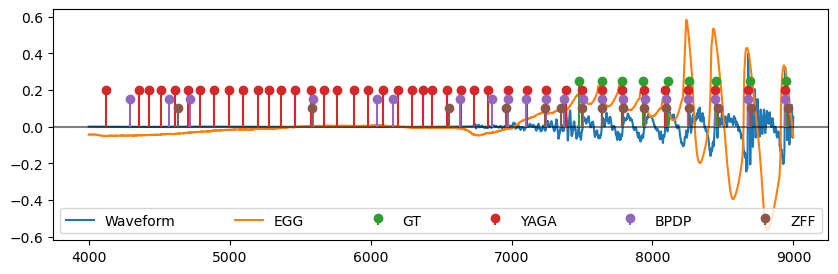

In [239]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
#t = 59000
t = 4000
l = 5000
o = 50
_time = torch.arange(t, t+l)


#ax.plot(wav[0, t:t+10000])
ax.plot(_time, wav[0, t:t+l], label="Waveform")
ax.plot(_time, -wav[1, t:t+l], label="EGG")
#ax.plot(_time, y1[t:t+10000]/20, label="lowpass filtered waveform" )
ax.axhline(0, color='black', alpha=0.5)


# filter the p
_p = torch.tensor([x for x in ans if t < x < t + l]) + o
_y = torch.ones_like(_p)*0.25
ax.stem(_p.numpy(), _y.numpy(), 'C2-', basefmt=" ", label="GT")

# filter the p
_p = torch.tensor([x for x in yaga if t < x < t + l])
_y = torch.ones_like(_p)*0.20
ax.stem(_p.numpy(), _y.numpy(), 'C3-', basefmt=" ", label="YAGA")

# filter the p2
_p = torch.tensor([x for x in bpdp if t < x < t + l])
_y = torch.ones_like(_p)*0.15
ax.stem(_p.numpy(), _y.numpy(), 'C4-', markerfmt="o", basefmt=" ", label="BPDP")

# filter the p2
_p = torch.tensor([x for x in hpzff if t < x < t + l])
_y = torch.ones_like(_p)*0.10
ax.stem(_p.numpy(), _y.numpy(), 'C5-', markerfmt="o", basefmt=" ", label="ZFF")

#ax.axvspan(60600-70, 60600+2200, alpha=0.5, color='lightsalmon')

ax.legend(loc=4, mode = "expand", ncol = 6)
#fig.savefig("bdl_a0010.pdf", bbox_inches = 'tight',  pad_inches = 0.1)

In [176]:
62000/32000

1.9375